In [1]:
graph = {
    0: [1, 2, 5],
    1: [0, 2, 3, 4],
    2: [0, 1, 3, 5],
    3: [1, 2, 4, 6],
    4: [1, 3, 6, 7],
    5: [0, 2, 7, 8],
    6: [3, 4, 7, 9],
    7: [4, 5, 6, 9],
    8: [5, 9],
    9: [6, 7, 8]
}

In [2]:
import networkx as nx
import matplotlib.pyplot as plt
def degeneracy_ordering(graph):
    """
    Computes the degeneracy ordering of a graph.
    """
    # Copy the graph to manipulate
    degrees = {v: len(graph[v]) for v in graph}  # Compute initial degrees
    ordering = []  # List to store the degeneracy ordering
    vertices = set(graph.keys())  # Remaining vertices
    while vertices:
        # Find the vertex with the smallest degree
        v = min(vertices, key=lambda x: degrees[x])
        ordering.append(v)  # Add to the ordering
        vertices.remove(v)  # Remove the vertex from the set

        # Update degrees of neighbors
        for neighbor in graph[v]:
            if neighbor in vertices:
                degrees[neighbor] -= 1

    return ordering

def degeneracy_coloring(graph):
    """
    Colors a graph using a degeneracy-based greedy algorithm.
    """
    # Compute degeneracy ordering
    ordering = degeneracy_ordering(graph)
    
    coloring = {}  # Store the color assignments
    for vertex in ordering:
        # Find the colors of adjacent vertices
        adjacent_colors = {coloring[neighbor] for neighbor in graph[vertex] if neighbor in coloring}
        
        # Assign the smallest available color
        color = 0
        while color in adjacent_colors:
            color += 1
        coloring[vertex] = color
    
    return coloring
max_degree = max((len(graph[v]) for v in graph))
coloring_number = max_degree + 1
print(f"The coloring number is {coloring_number}")
# Perform Degeneracy-Based Coloring
coloring_result = degeneracy_coloring(graph)

# Print Results
print("Degeneracy Ordering and Coloring:")
for vertex, color in coloring_result.items():
    print(f"Vertex {vertex}: Color {color}")


The coloring number is 5
Degeneracy Ordering and Coloring:
Vertex 8: Color 0
Vertex 9: Color 1
Vertex 0: Color 0
Vertex 5: Color 1
Vertex 2: Color 2
Vertex 1: Color 1
Vertex 3: Color 0
Vertex 4: Color 2
Vertex 6: Color 3
Vertex 7: Color 0


/var/folders/ns/s4s78hns3jq5qk64vq8c8z5c0000gn/T/ipykernel_7692/302989734.py:22: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap=plt.cm.get_cmap('tab20'),


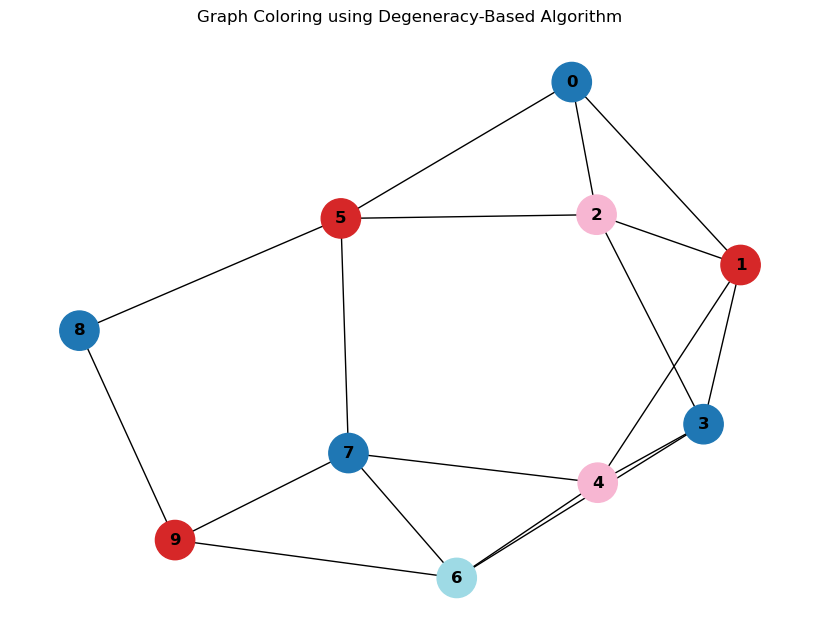

In [3]:
def plot_degeneracy_coloring(graph, coloring):
    """
    Visualizes the graph with colors assigned according to the degeneracy-based coloring algorithm.
    """
    G = nx.Graph()

    # Add edges to the graph
    for vertex, neighbors in graph.items():
        for neighbor in neighbors:
            G.add_edge(vertex, neighbor)

    # Get colors for each node based on the coloring result
    node_colors = [coloring[node] for node in G.nodes]

    # Plot the graph
    plt.figure(figsize=(8, 6))
    nx.draw(
        G,
        with_labels=True,
        node_color=node_colors,
        node_size=800,
        cmap=plt.cm.get_cmap('tab20'),
        font_weight='bold'
    )
    plt.title("Graph Coloring using Degeneracy-Based Algorithm")
    plt.show()

plot_degeneracy_coloring(graph, coloring_result)